In [89]:
import pandas as pd
dog = pd.read_csv('도그도그2.csv')
dog

,서울특별시 구,동물등록현황,공영주차장 개수,구별 1인당 근린공원 접근 면적(㎡)
0,강남구,27180,61,3.81
1,강동구,20295,23,2.80
2,강북구,15346,36,5.93
3,강서구,26362,45,3.82
4,관악구,21199,20,3.59
5,광진구,16567,26,2.33
6,구로구,15279,26,2.62
7,금천구,9982,42,1.35
8,노원구,22590,26,2.38
9,도봉구,16729,16,2.31


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


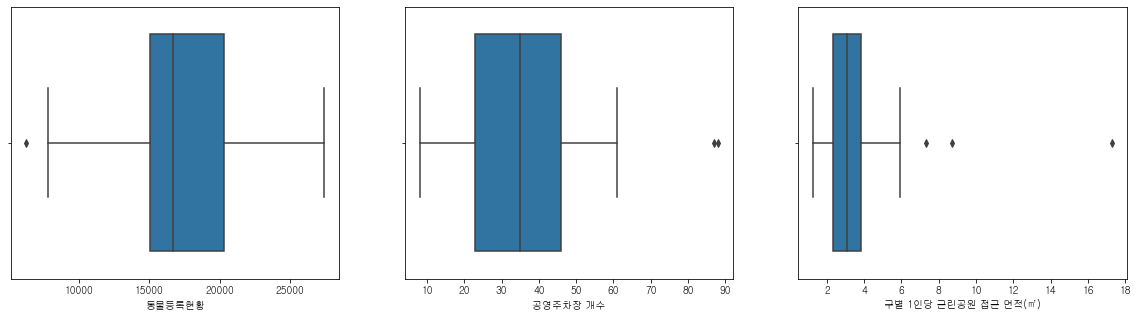

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


X = dog[['동물등록현황','공영주차장 개수','구별 1인당 근린공원 접근 면적(㎡)']]
fig, axs = plt.subplots(1,3, figsize=(20, 5))
sns.boxplot(X['동물등록현황'], ax=axs[0])
sns.boxplot(X['공영주차장 개수'], ax=axs[1])
sns.boxplot(X['구별 1인당 근린공원 접근 면적(㎡)'], ax=axs[2])
plt.show()

In [117]:
from sklearn.preprocessing import StandardScaler
list = ['동물등록현황','공영주차장 개수','구별 1인당 근린공원 접근 면적(㎡)']
scaler = StandardScaler()
scaler.fit(X)
X_stand = scaler.transform(X)


from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(linkage='ward')
agg = hc.fit_predict(X_stand)
print(agg)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]


In [118]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
S_score = silhouette_score(X_stand, agg)
C_score = calinski_harabasz_score(X_stand, agg)
print("{:.5f}".format(S_score))
print("{:.5f}".format(C_score))

0.59798
16.59491


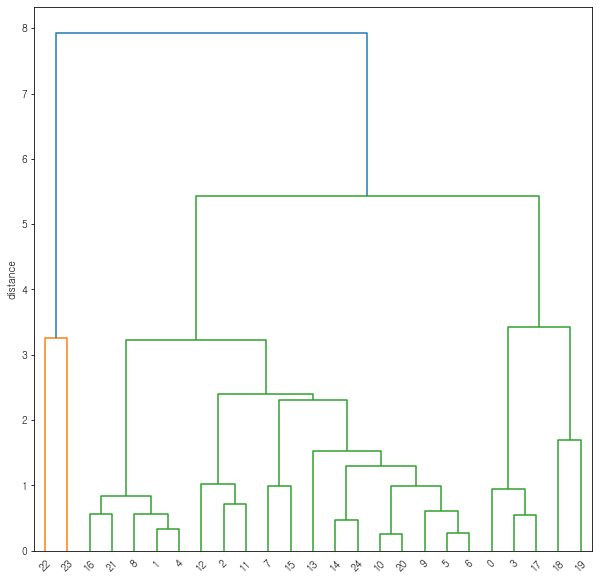

In [119]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
hc = linkage(X_stand, method='ward')
plt.figure(figsize=(10,10))
plt.ylabel('distance')
dendrogram(hc)
plt.show()